In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import datetime, os
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import linalg as LA
import cv2
from tqdm import tqdm

In [11]:
!pip install tqdm

     |████████████████████████████████| 78 kB 741 kB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score, make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('./input/boneage-training-dataset.csv')

In [4]:
belongs_to = np.ones(len(df['boneage']))
for k, age in tqdm(enumerate(df['boneage'])):
    if age <= 3:
        belongs_to[k] = 1
    elif age > 3  and  age <= 6:
        belongs_to[k] = 2
    elif age > 6  and  age <= 9:
        belongs_to[k] = 3
    elif age > 9  and  age <= 12:
        belongs_to[k] = 4
    elif age > 12  and  age <= 15:
        belongs_to[k] = 5
    elif age > 15  and  age <= 18:
        belongs_to[k] = 6
    elif age > 18  and  age <= 21:
        belongs_to[k] = 7
    elif age > 21  and  age <= 24:
        belongs_to[k] = 8
    elif age > 24  and  age <= 30:
        belongs_to[k] = 9
    elif age > 30  and  age <= 36:
        belongs_to[k] = 10
    elif age > 36  and  age <= 42:
        belongs_to[k] = 11
    elif age > 42  and  age <= 48:
        belongs_to[k] = 12
    elif age > 48  and  age <= 54:
        belongs_to[k] = 13
    elif age > 54  and  age <= 60:
        belongs_to[k] = 14
    elif age > 60  and  age <= 66:
        belongs_to[k] = 15
    elif age > 66  and  age <= 72:
        belongs_to[k] = 16
    elif age > 72  and  age <= 78:
        belongs_to[k] = 17
    elif age > 78  and  age <= 84:
        belongs_to[k] = 18
    elif age > 84  and  age <= 90:
        belongs_to[k] = 19
    elif age > 90  and  age <= 96:
        belongs_to[k] = 20
    elif age > 96  and  age <= 102:
        belongs_to[k] = 21
    elif age > 102  and  age <= 108:
        belongs_to[k] = 22
    elif age > 108  and  age <= 114:
        belongs_to[k] = 23
    elif age > 114  and  age <= 120:
        belongs_to[k] = 24
    elif age > 120  and  age <= 132:
        belongs_to[k] = 25
    elif age > 132  and  age <= 144:
        belongs_to[k] = 26
    elif age > 144  and  age <= 156:
        belongs_to[k] = 27
    elif age > 156  and  age <= 168:
        belongs_to[k] = 28
    elif age > 168  and  age <= 180:
        belongs_to[k] = 29
    elif age > 180  and  age <= 192:
        belongs_to[k] = 30
    elif age > 192  and  age <= 204:
        belongs_to[k] = 31
    elif age > 204  and  age <= 216:
        belongs_to[k] = 32

12611it [00:00, 563581.39it/s]


In [5]:
belongs_to

array([29.,  4., 20., ..., 14., 27., 25.])

In [6]:
df['belongs_to_group'] = belongs_to.tolist()

In [7]:
df['belongs_to_group'] = pd.to_numeric(df['belongs_to_group'], downcast='integer')

In [8]:
df.head(10)

,id,boneage,male,belongs_to_group
0,1377,180,False,29
1,1378,12,False,4
2,1379,94,False,20
3,1380,120,True,24
4,1381,82,False,18
5,1382,138,True,26
6,1383,150,True,27
7,1384,156,True,27
8,1385,36,True,10
9,1387,138,True,26


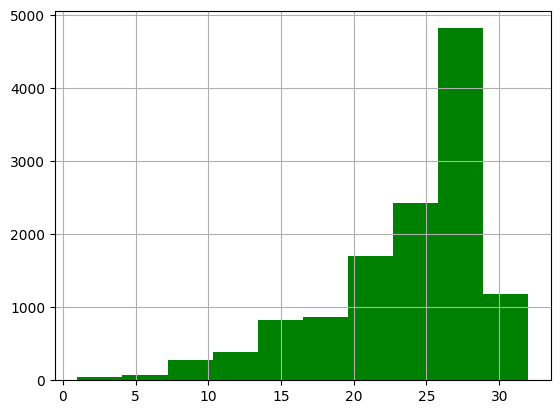

In [9]:
df['belongs_to_group'].hist(color = 'green')
plt.show()

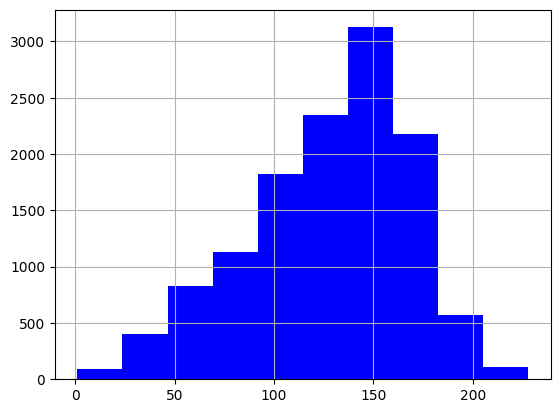

In [13]:
df['boneage'].hist(color = 'blue')
plt.show()

In [14]:
X = pd.get_dummies(df, columns=['male'], drop_first=True)
y = df['belongs_to_group']

In [15]:
X.head()

,id,boneage,belongs_to_group,male_True
0,1377,180,29,0
1,1378,12,4,0
2,1379,94,20,0
3,1380,120,24,1
4,1381,82,18,0


In [16]:
y

0        29
1         4
2        20
3        24
4        18
         ..
12606    13
12607    23
12608    14
12609    27
12610    25
Name: belongs_to_group, Length: 12611, dtype: int8

In [17]:
# Get dataset RNSA

def get_dataset():
    #loading dataframes
    train_df = pd.read_csv('./input/boneage-training-dataset.csv')
    test_df = pd.read_csv('./input/boneage-test-dataset.csv')

    #appending file extension to id column for both training and testing dataframes
    train_df['id'] = train_df['id'].apply(lambda x: str(x)+'.png')
    test_df['Case ID'] = test_df['Case ID'].apply(lambda x: str(x)+'.png') 
    train_df['gender'] = train_df['male'].apply(lambda x: 'male' if x else 'female')
    return train_df, test_df

In [18]:
train_df,_ = get_dataset()

In [19]:
data = np.ones(len(X) * 32 *32)

In [20]:
data = data.reshape((len(X), 32 , 32))

In [21]:
data.shape

(12611, 32, 32)

In [ ]:
data = np.ones(len(X) * 256 *256)
data = data.reshape((len(X), 256 , 256))
count = 0
for filename, boneage in tqdm(list(train_df[['id','boneage']].values)):
    fname = './input/boneage-training-dataset/boneage-training-dataset/'+ filename
    img = cv2.imread(fname)
    img  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)

    data[count,:,:] = img.tolist()
    count += 1

In [92]:
c=data.reshape(len(X),-1)

In [99]:
(trainX, testX, trainY, testY ) = train_test_split(c, y, test_size= 0.25, random_state=42)

In [150]:
testX

array([[  8.,   8.,   7., ...,  23.,  23.,  24.],
       [ 30.,  28.,  27., ...,  20.,  23.,  26.],
       [ 10.,  15.,  15., ...,   4.,   5.,   6.],
       ...,
       [ 23.,  22.,  21., ...,  27.,  27.,  30.],
       [ 99.,  99.,  99., ...,  98.,  98.,  99.],
       [ 19.,  23., 142., ...,  36.,  37.,  39.]])

In [149]:
df.iloc[8140]

id                  10613
boneage                94
male                False
belongs_to_group       20
Name: 8140, dtype: object

In [146]:
belongs_to[8140]

20.0

In [152]:
y_pred[0]

20

In [135]:
testY

8140     20
11389    24
1945     29
7981     24
9359     18
         ..
1253     20
5822     27
3837     26
2503     26
9269     10
Name: belongs_to_group, Length: 3153, dtype: int8

In [100]:
print(trainX.shape)
print(testX.shape)

(9458, 1024)
(3153, 1024)


In [101]:
model = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
model.fit(trainX, trainY)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [107]:
y_pred = model.predict(testX)

In [113]:
a = testX[0].reshape((32,32))

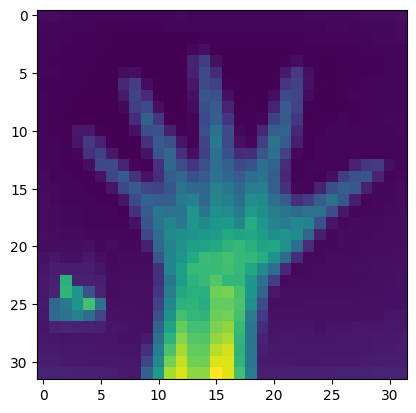

In [116]:
plt.imshow(a)
plt.show()

In [156]:
sum(y_pred == testY) / len(testY) * 100

8.9755788138281

In [166]:
accuracy_score(testY, y_pred)

0.089755788138281

In [158]:
print(classification_report(testY, y_pred, labels = y.unique() ))

              precision    recall  f1-score   support

          29       0.29      0.06      0.09       144
           4       0.00      0.00      0.00         6
          20       0.11      0.16      0.13       209
          24       0.07      0.09      0.08       251
          18       0.08      0.13      0.10       159
          26       0.09      0.07      0.08       299
          27       0.20      0.14      0.16       450
          10       0.06      0.05      0.06        38
          25       0.10      0.12      0.11       313
          14       0.03      0.05      0.04        84
          30       0.50      0.01      0.02        93
           2       0.00      0.00      0.00         1
           8       0.00      0.00      0.00        17
          28       0.19      0.11      0.14       424
          22       0.03      0.04      0.03       181
           9       0.00      0.00      0.00        13
          17       0.03      0.03      0.03        30
          19       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1